In [25]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [26]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
y_train.shape

(60000,)

In [30]:
x_test.shape

(10000, 28, 28)

In [31]:
x_test=x_test.reshape(-1,784)
x_train=x_train.reshape(-1, 784)

In [32]:
from keras.models import Sequential

In [33]:
from keras.layers import Dense

In [34]:
model=Sequential()
model.add(Dense(units=64, activation='relu',input_shape= (784, )))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 128, activation='relu'))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 10, activation='softmax'))


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 71,626
Trainable params: 71,626
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'] ) 

In [37]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [38]:
from tensorflow.keras.utils import to_categorical


In [39]:
y_train.shape

(60000,)

In [40]:
y_train=to_categorical(y_train)
y_train.shape

(60000, 10)

In [41]:
y_test=to_categorical(y_test)
y_test.shape

(10000, 10)

In [42]:
hist=model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.7932 - accuracy: 0.8381 - val_loss: 0.2635 - val_accuracy: 0.9281
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2414 - accuracy: 0.9302 - val_loss: 0.2204 - val_accuracy: 0.9390
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1928 - accuracy: 0.9437 - val_loss: 0.1939 - val_accuracy: 0.9462
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1648 - accuracy: 0.9517 - val_loss: 0.2039 - val_accuracy: 0.9444
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1394 - accuracy: 0.9596 - val_loss: 0.1741 - val_accuracy: 0.9523
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1257 - accuracy: 0.9634 - val_loss: 0.1666 - val_accuracy: 0.9572
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.9681 - val_loss: 0.1789 - val_accuracy:

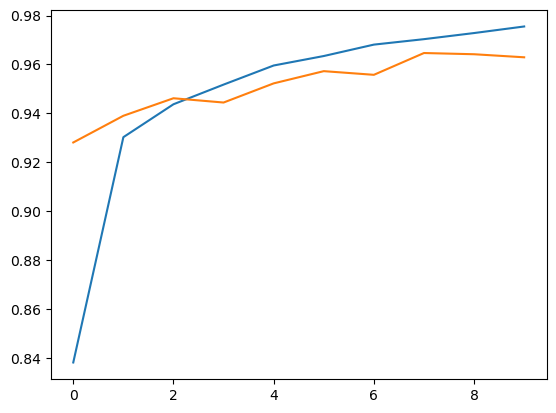

In [43]:
history=hist.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

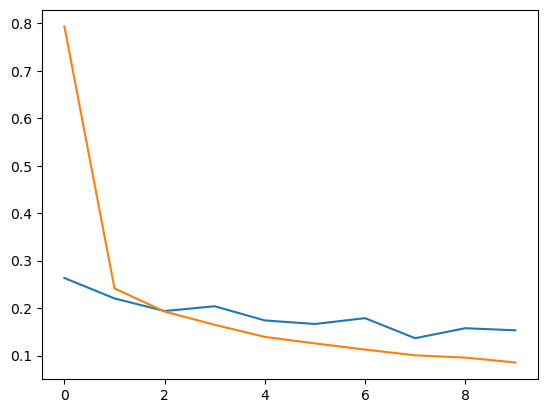

In [44]:
history=hist.history
plt.plot(history['val_loss'])
plt.plot(history['loss'])

In [45]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 818us/step - loss: 0.0867 - accuracy: 0.9767


[0.08672381192445755, 0.9766666889190674]

In [46]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 809us/step - loss: 0.1546 - accuracy: 0.9617


[0.15460388362407684, 0.9617000222206116]

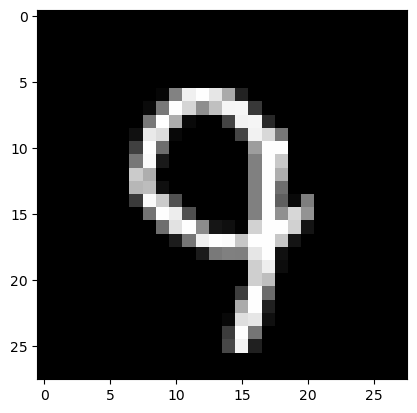

In [47]:
plt.imshow(x_test[999].reshape(28,28), cmap='gray')

In [48]:
model.predict(x_test[999].reshape(-1,784))

1/1 [==============================] - 0s 51ms/step


array([[1.7991707e-09, 2.4784178e-05, 7.2634357e-05, 1.5770670e-04,
        4.3228786e-03, 6.6194778e-05, 6.5365541e-10, 2.9930330e-03,
        2.3164599e-05, 9.9233961e-01]], dtype=float32)